In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv('../data/processed/data_processed.csv')

(0.0, 1700.0)

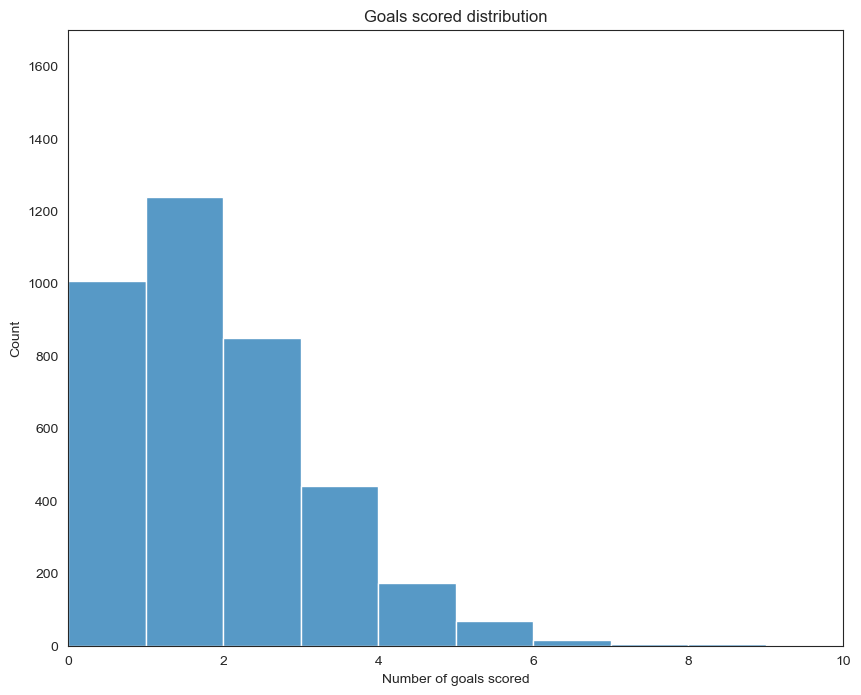

In [3]:
# Plot the distribution of goals scored
sns.set_style('white')
f, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data=data,
             x='gf',
             stat='count',
             binwidth=1,
             ax=ax)

plt.title('Goals scored distribution')
plt.xlabel('Number of goals scored')
plt.ylabel('Count')
plt.xlim(0, 10)
plt.ylim(0,1700)

(0.0, 1700.0)

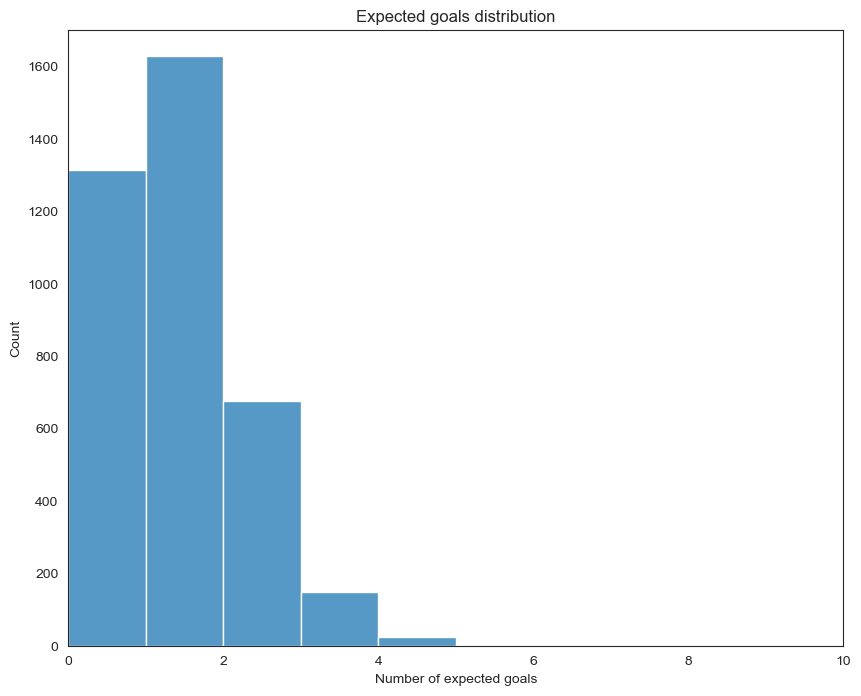

In [4]:
# Plot the distribution of expected goals
f, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data=data,
             x='xg',
             stat='count',
             binwidth=1,
             ax=ax)

plt.title('Expected goals distribution')
plt.xlabel('Number of expected goals')
plt.ylabel('Count')
plt.xlim(0, 10)
plt.ylim(0,1700)

(0.0, 700.0)

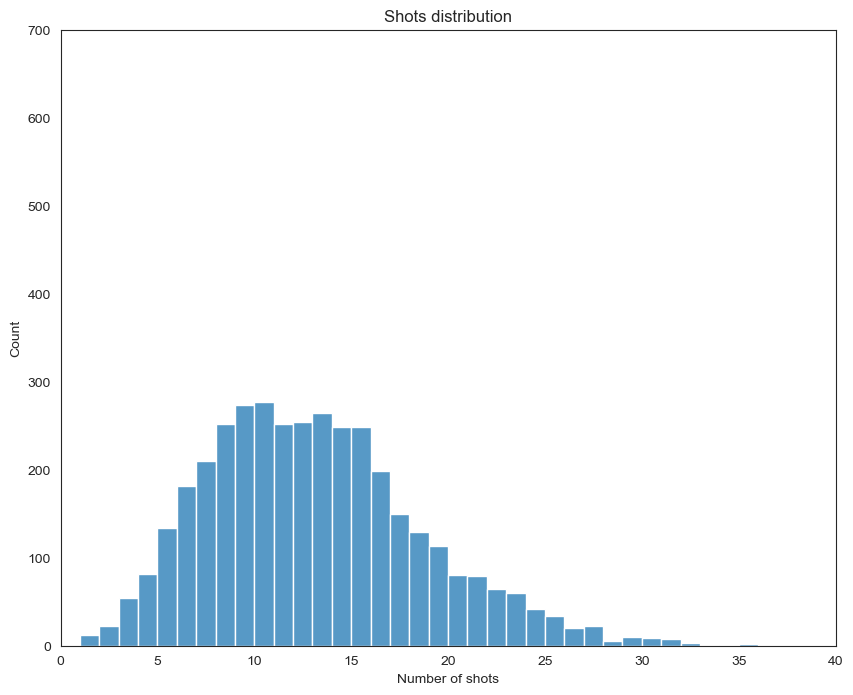

In [5]:
# Plot the distribution of shots
f, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data=data,
             x='sh',
             stat='count',
             binwidth=1,
             ax=ax)

plt.title('Shots distribution')
plt.xlabel('Number of shots')
plt.ylabel('Count')
plt.xlim(0, 40)
plt.ylim(0,700)

(0.0, 700.0)

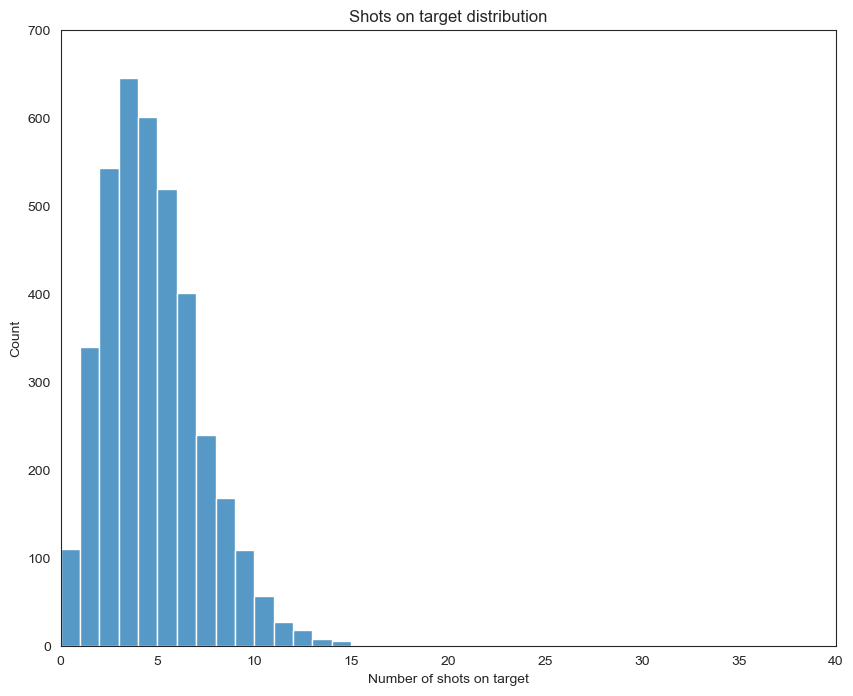

In [6]:
# Plot the distribution of shots on target
f, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data=data,
             x='sot',
             stat='count',
             binwidth=1,
             ax=ax)

plt.title('Shots on target distribution')
plt.xlabel('Number of shots on target')
plt.ylabel('Count')
plt.xlim(0, 40)
plt.ylim(0,700)

(0.0, 700.0)

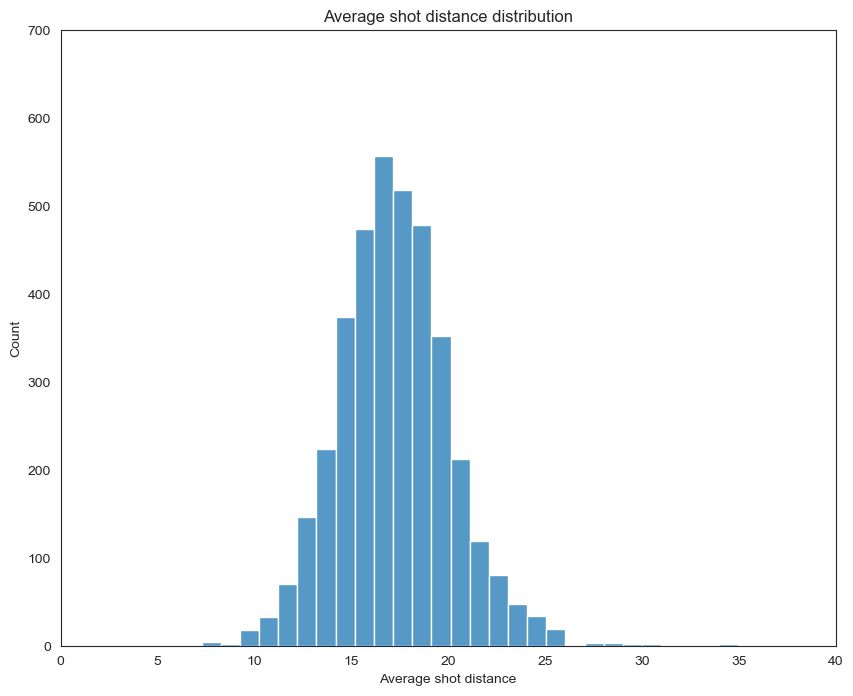

In [7]:
# Plot the distribution of average shot distance
f, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data=data,
             x='dist',
             stat='count',
             binwidth=1,
             ax=ax)

plt.title('Average shot distance distribution')
plt.xlabel('Average shot distance')
plt.ylabel('Count')
plt.xlim(0, 40)
plt.ylim(0,700)

(0.0, 600.0)

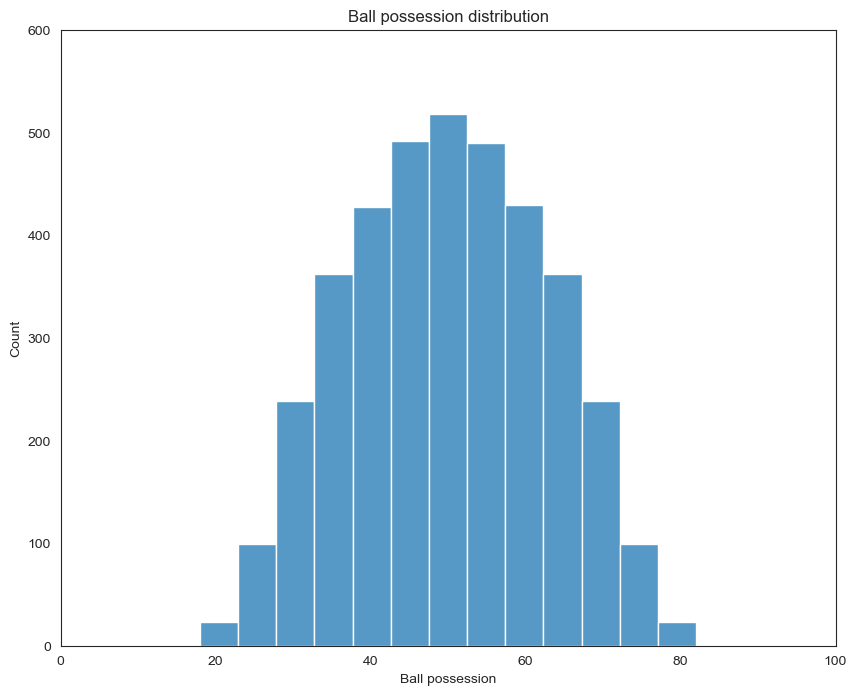

In [8]:
# Plot the distribution of possession
f, ax = plt.subplots(figsize=(10, 8))

sns.histplot(data=data,
             x='poss',
             stat='count',
             binwidth=5,
             ax=ax)

plt.title('Ball possession distribution')
plt.xlabel('Ball possession')
plt.ylabel('Count')
plt.xlim(0, 100)
plt.ylim(0,600)

<Axes: >

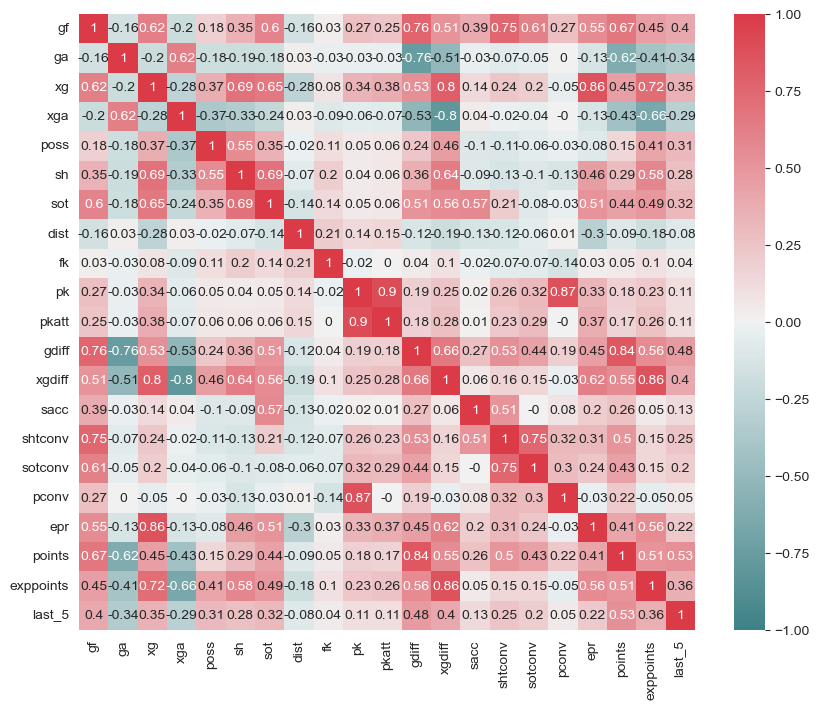

In [9]:
# Display correlation heatmap of numerical features
data_numeric = data.drop(labels=['date', 'round', 'result', 'opponent', 'formation', 'season', 'team'], axis=1)

f, ax = plt.subplots(figsize=(10, 8))
corr = round(data_numeric.corr(), 2)
sns.heatmap(corr,
            cmap=sns.diverging_palette(200, 10, as_cmap=True),
            vmin=-1.0,
            vmax=1.0,
            annot=True,
            square=True,
            ax=ax
           )

In [10]:
# Group team data to analyze team performance metrics
data_team = data.drop(labels=['date', 'round', 'result', 'opponent', 'formation', 'last_5'], axis=1)

team_agg_col = data_team.drop(labels=['team', 'season'], axis=1).columns

data_team_performance = data_team.groupby(by='team', observed=False)[team_agg_col] \
                                    .aggregate('mean') \
                                    .reset_index() \
                                    .sort_values(['points'], ascending=False)

data_team_performance

,team,gf,ga,xg,xga,poss,sh,sot,dist,fk,...,pkatt,gdiff,xgdiff,sacc,shtconv,sotconv,pconv,epr,points,exppoints
14,Manchester City,2.494737,0.842105,2.147895,0.836842,65.526316,17.378947,6.142105,16.727368,0.578947,...,0.257895,1.652632,1.311053,0.366151,0.155273,0.435441,0.723404,0.033031,2.315789,2.415789
12,Liverpool,2.147368,0.994737,2.023684,1.111053,61.936842,17.321053,5.952632,16.875263,0.421053,...,0.168421,1.152632,0.912632,0.352706,0.134810,0.383433,0.810345,0.033024,2.152632,2.068421
0,Arsenal,1.847368,1.089474,1.615789,1.127368,55.505263,14.068421,4.605263,16.758947,0.447368,...,0.163158,0.757895,0.488421,0.338744,0.139479,0.397339,0.866667,0.029356,1.889474,1.794737
15,Manchester United,1.636842,1.252632,1.588421,1.325789,53.700000,14.110526,5.073684,18.021053,0.568421,...,0.210526,0.384211,0.262632,0.366403,0.125142,0.334172,0.815789,0.030289,1.752632,1.552632
21,Tottenham Hotspur,1.800000,1.347368,1.513158,1.344737,53.400000,12.936842,4.731579,17.497895,0.510526,...,0.115789,0.452632,0.168421,0.374768,0.150944,0.418811,0.909091,0.028656,1.673684,1.447368
6,Chelsea,1.673684,1.226316,1.678421,1.118947,60.068421,14.552632,4.989474,17.101053,0.542105,...,0.215789,0.447368,0.559474,0.347677,0.123052,0.353996,0.891892,0.028378,1.652632,1.889474
16,Newcastle United,1.478947,1.457895,1.396842,1.487368,44.531579,12.321053,4.126316,17.654211,0.410526,...,0.136842,0.021053,-0.090526,0.336506,0.122853,0.362565,0.891304,0.030918,1.415789,1.294737
11,Leicester City,1.631579,1.434211,1.425658,1.405263,52.763158,12.177632,4.335526,17.990789,0.447368,...,0.177632,0.197368,0.020395,0.372577,0.148948,0.412244,0.714286,0.027715,1.407895,1.394737
1,Aston Villa,1.447368,1.442105,1.339474,1.477368,48.284211,12.452632,4.268421,17.394737,0.473684,...,0.105263,0.005263,-0.137895,0.343643,0.122864,0.371934,0.800000,0.027964,1.389474,1.252632
24,West Ham United,1.436842,1.521053,1.354211,1.528421,43.694737,11.742105,3.868421,16.484211,0.384211,...,0.142105,-0.084211,-0.174211,0.346798,0.130690,0.383474,0.740741,0.032141,1.326316,1.200000


In [90]:
#Create function for plotting
def custom_scatter(**kwargs):
    
    """
    Creates custom scatterplot unpacking the dictionary with the given parameters:

    :param **kwargs: unpacks specified dictionary with all parameters needed, example dictionary looks like this:
    
        example_dict = {
        "Figsize": (number, number), #Two numbers describing height and width of the plot
        "Data": DataFrame, #Source DataFrame
        "X": "x_column_name", #Name of the column displayed as the x axis
        "Y": "y_column_name", #Name of the column displayed as the y axis
        "Title": "plot_title", #Main title of the plot
        "Xlabel": "x_axis_title", #Title of the x-axis
        "Ylabel": "y_axis_title", #Title of the y-axis
        "Xlim": (number, number), #Range of the x-axis
        "Ylim": (number, number), #Range of the y-axis
        "Xticks": (np.arange(number, number, number)), #Range (two numbers) and spacing between the x-axis grid lines 
        "Yticks": (np.arange(number, number, number)), #Range (two numbers) and spacing between the y-axis grid lines
        "Column": "column_by_which_data_was_grouped", #Data labels displayed on the plot
        "Fontsize": number #Label's fontsize
        }

    :return: displays created plot
    
    """
    
    # Set style to 'whitegrid'
    sns.set_style('whitegrid')
    
    # Create the plot
    f, ax = plt.subplots(figsize=kwargs["Figsize"])
    
    # Create scatter plot
    sns.scatterplot(data=kwargs["Data"], 
                    x=kwargs["X"], 
                    y=kwargs["Y"], 
                    legend=None, 
                    ax=ax)

    # Set labels and limits
    ax.set_title(kwargs["Title"])
    ax.set_xlabel(kwargs["Xlabel"])
    ax.set_ylabel(kwargs["Ylabel"])
    ax.set_xlim(kwargs["Xlim"])
    ax.set_ylim(kwargs["Ylim"])
    ax.set_xticks(kwargs["Xticks"])
    ax.set_yticks(kwargs["Yticks"])
    
    # Add text annotations
    for i in range(kwargs["Data"].shape[0]):
        ax.text(kwargs["Data"].loc[i, kwargs["X"]],
                kwargs["Data"].loc[i, kwargs["Y"]],
                kwargs["Data"].loc[i, kwargs["Column"]],
                fontsize=kwargs["Fontsize"],
                ha='left')

    # Show the plot
    plt.show()

    # Return the axis object for further customization
    return ax

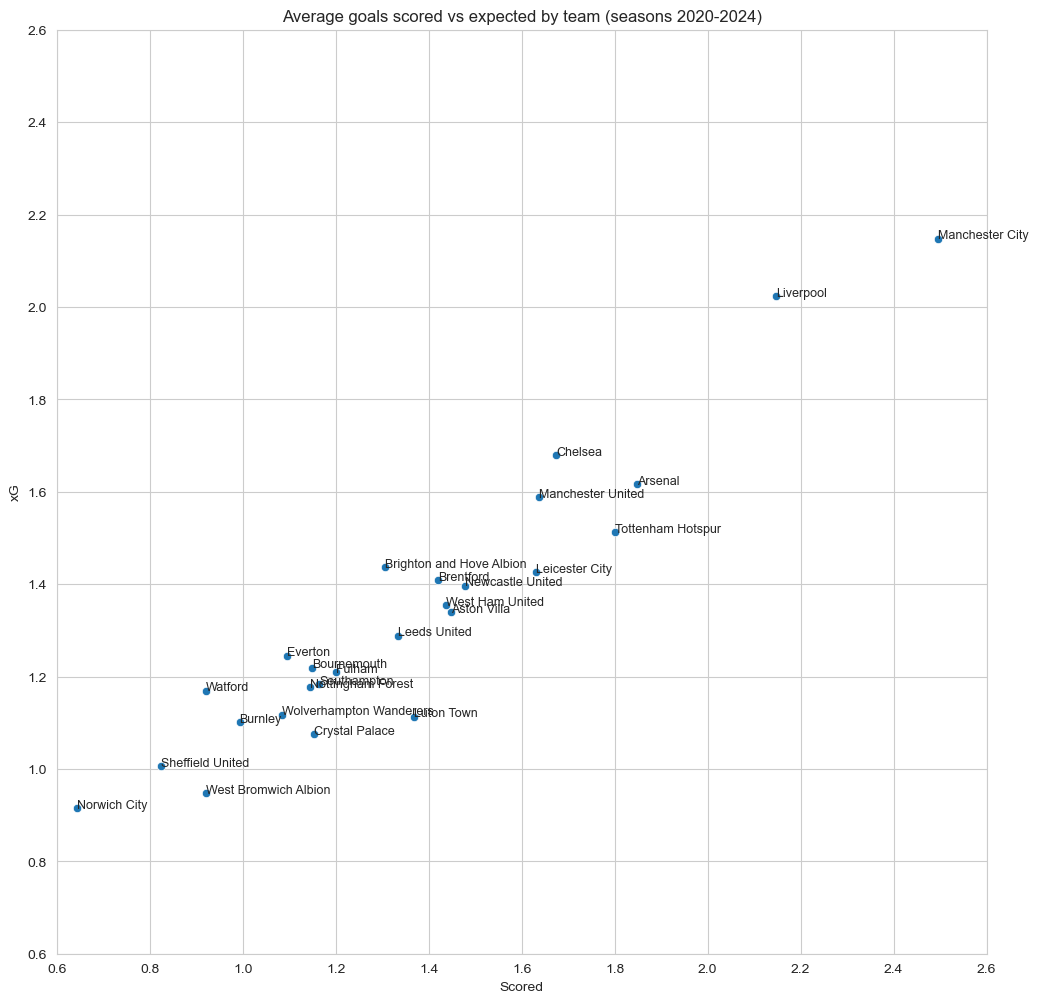

<Axes: title={'center': 'Average goals scored vs expected by team (seasons 2020-2024)'}, xlabel='Scored', ylabel='xG'>

In [12]:
# Compare goals scored and expected

gf_xg_team = {
    "Figsize": (12, 12),
    "Data": data_team_performance,
    "X": "gf",
    "Y": "xg",
    "Title": "Average goals scored vs expected by team (seasons 2020-2024)",
    "Xlabel": "Scored",
    "Ylabel": "xG",
    "Xlim": (0.6, 2.6),
    "Ylim": (0.6, 2.6),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(0.6, 2.8, 0.2)),
    "Column": "team",
    "Fontsize": 9
    }

custom_scatter(**gf_xg_team)

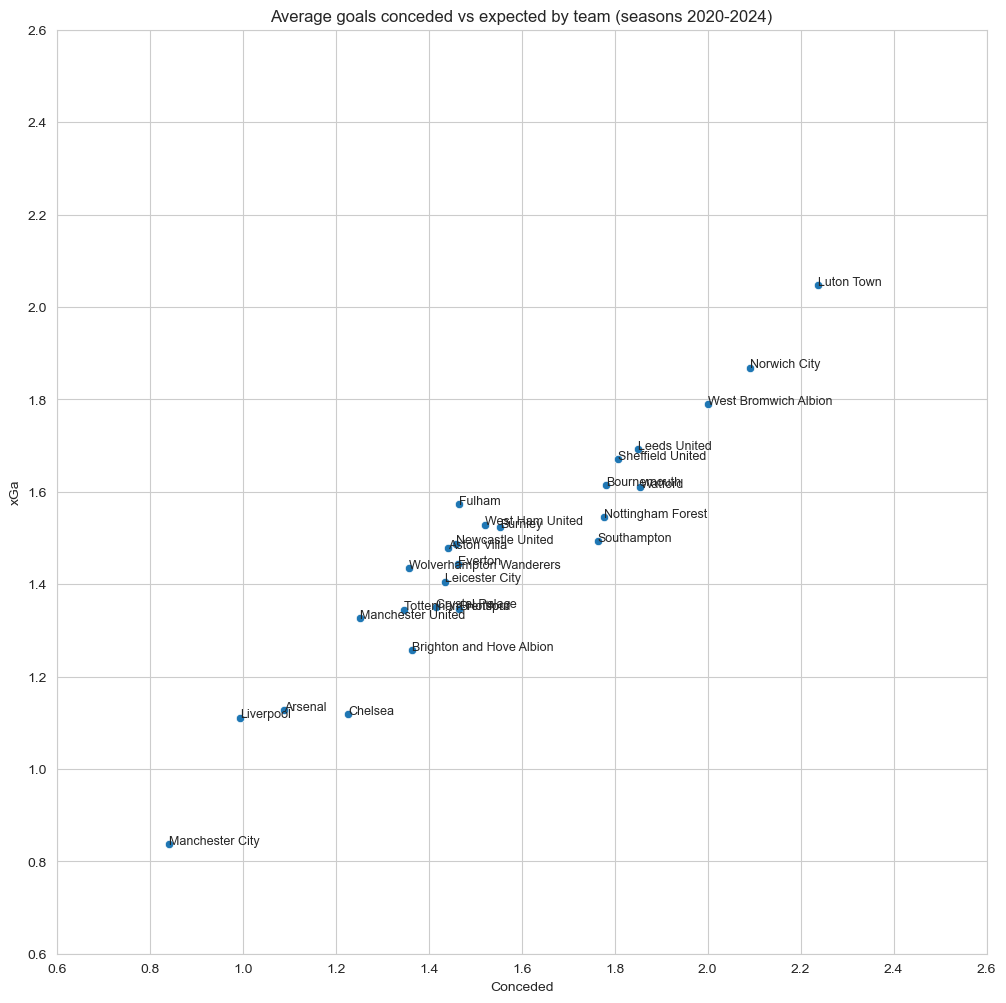

<Axes: title={'center': 'Average goals conceded vs expected by team (seasons 2020-2024)'}, xlabel='Conceded', ylabel='xGa'>

In [13]:
# Compare goals conceded and expected

ga_xga_team = {
    "Figsize": (12, 12),
    "Data": data_team_performance,
    "X": "ga",
    "Y": "xga",
    "Title": "Average goals conceded vs expected by team (seasons 2020-2024)",
    "Xlabel": "Conceded",
    "Ylabel": "xGa",
    "Xlim": (0.6, 2.6),
    "Ylim": (0.6, 2.6),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(0.6, 2.8, 0.2)),
    "Column": "team",
    "Fontsize": 9
    }
    
custom_scatter(**ga_xga_team)

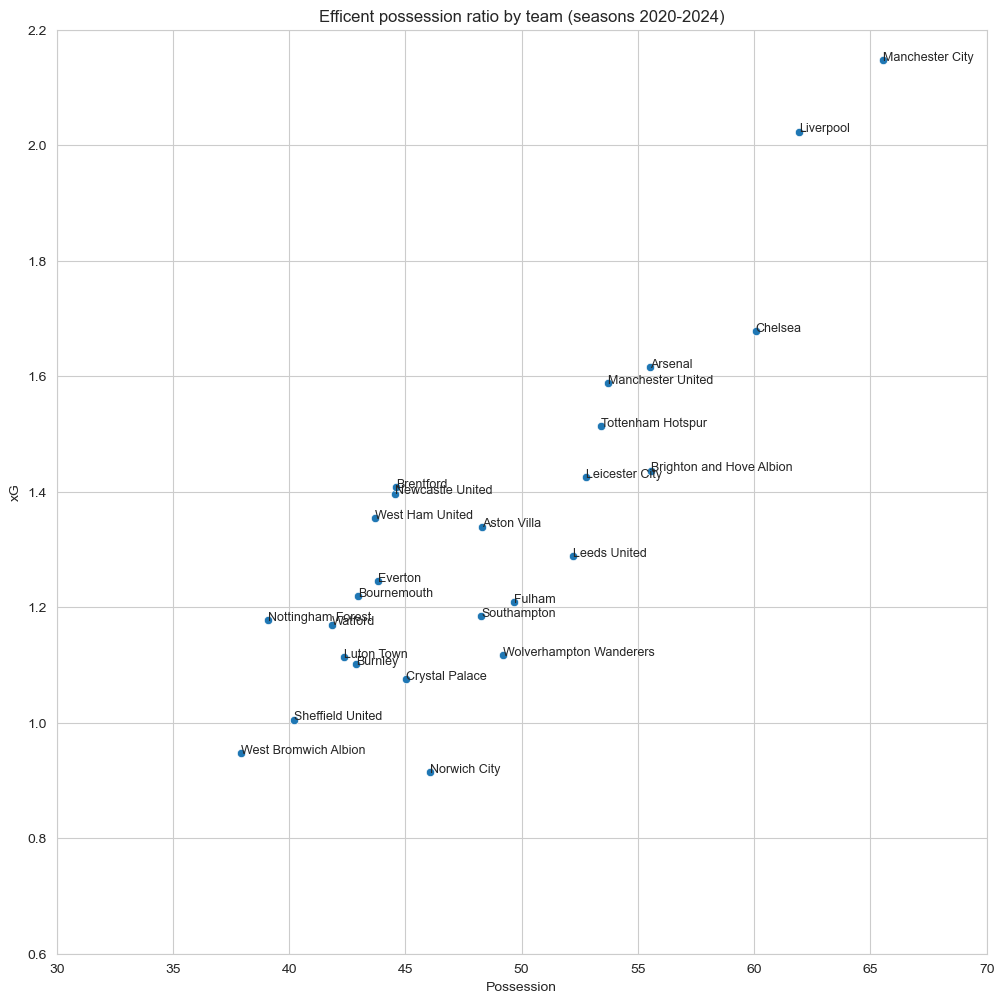

<Axes: title={'center': 'Efficent possession ratio by team (seasons 2020-2024)'}, xlabel='Possession', ylabel='xG'>

In [14]:
# Compare possession and expected goals

poss_xg_team = {
    "Figsize": (12, 12),
    "Data": data_team_performance,
    "X": "poss",
    "Y": "xg",
    "Title": "Efficent possession ratio by team (seasons 2020-2024)",
    "Xlabel": "Possession",
    "Ylabel": "xG",
    "Xlim": (30, 70),
    "Ylim": (0.6, 2.2),
    "Xticks": (np.arange(30, 75, 5)),
    "Yticks": (np.arange(0.6, 2.4, 0.2)),
    "Column": "team",
    "Fontsize": 9
    }
    
custom_scatter(**poss_xg_team)

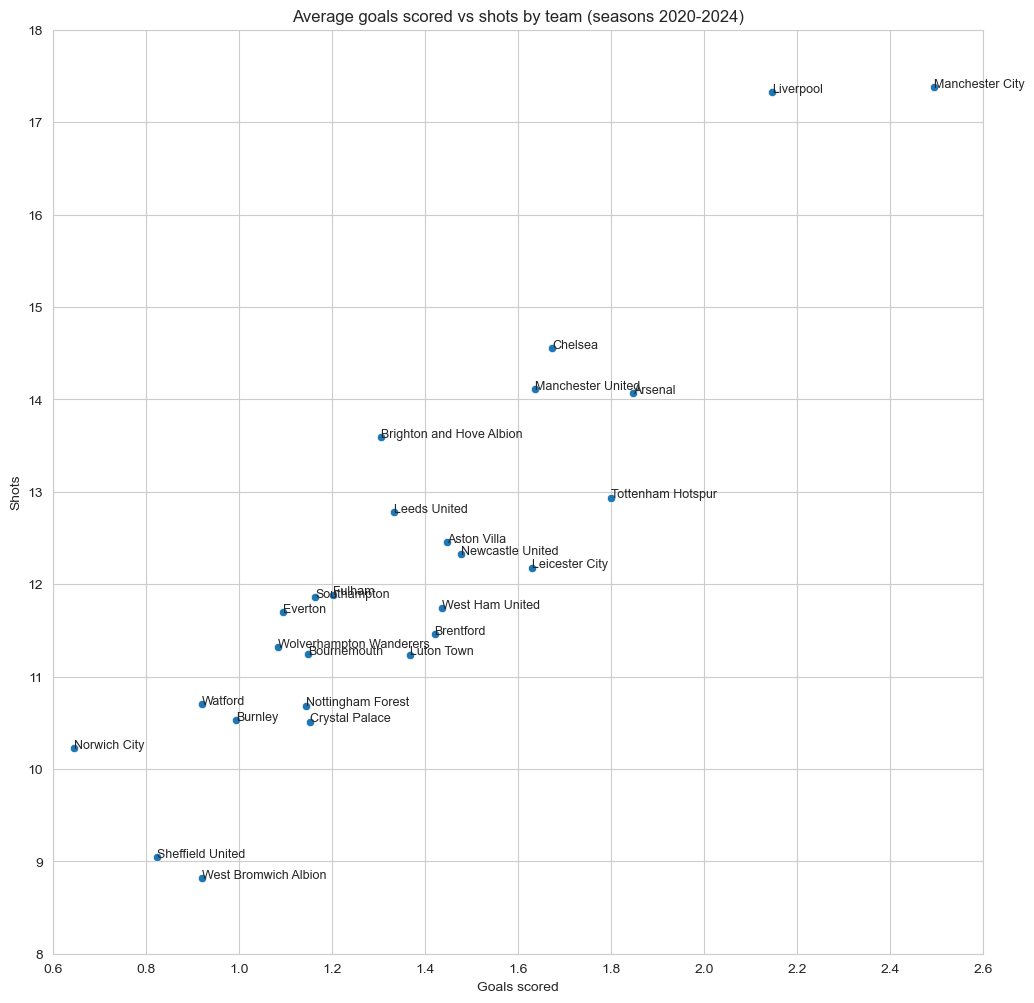

<Axes: title={'center': 'Average goals scored vs shots by team (seasons 2020-2024)'}, xlabel='Goals scored', ylabel='Shots'>

In [15]:
# Compare goals scored and shots

gf_sh_team = {
    "Figsize": (12, 12),
    "Data": data_team_performance,
    "X": "gf",
    "Y": "sh",
    "Title": "Average goals scored vs shots by team (seasons 2020-2024)",
    "Xlabel": "Goals scored",
    "Ylabel": "Shots",
    "Xlim": (0.6, 2.6),
    "Ylim": (8, 18),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(8, 19, 1)),
    "Column": "team",
    "Fontsize": 9
    }

custom_scatter(**gf_sh_team)

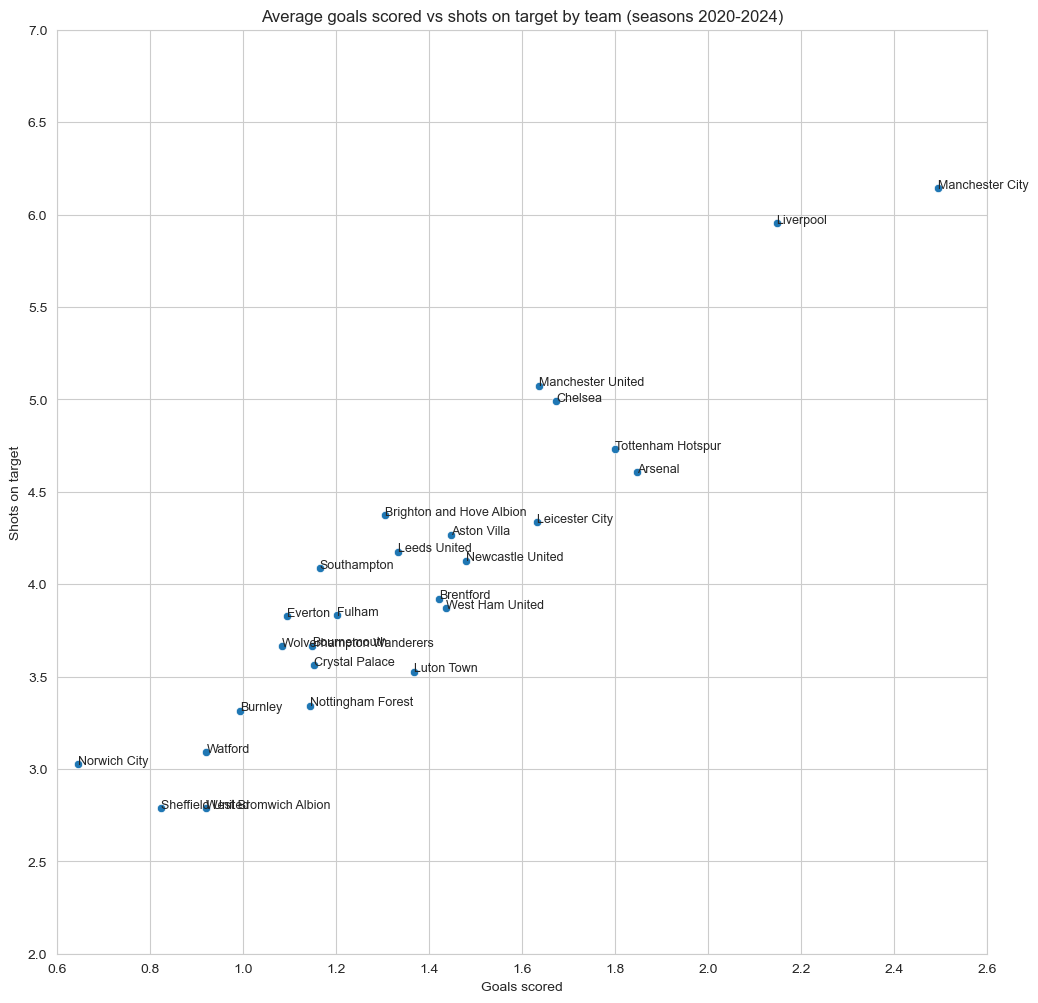

<Axes: title={'center': 'Average goals scored vs shots on target by team (seasons 2020-2024)'}, xlabel='Goals scored', ylabel='Shots on target'>

In [16]:
# Compare goals scored and shots on target

gf_sot_team = {
    "Figsize": (12, 12),
    "Data": data_team_performance,
    "X": "gf",
    "Y": "sot",
    "Title": "Average goals scored vs shots on target by team (seasons 2020-2024)",
    "Xlabel": "Goals scored",
    "Ylabel": "Shots on target",
    "Xlim": (0.6, 2.6),
    "Ylim": (2, 7),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(2, 7.5, 0.5)),
    "Column": "team",
    "Fontsize": 9
    }

custom_scatter(**gf_sot_team)

In [17]:
# Group by formation and filter formations with significant game counts (>= 38 games)
# (equivalent of one team playing that formation for one season)

data_formation = data.drop(labels=['date', 'round', 'result', 'opponent', 'season', 'team', 'last_5'], axis=1)

formation_count = data_formation['formation'].value_counts()

data_formation_filtered = data_formation[data_formation['formation'].isin(formation_count[formation_count >= 38].index)]

formation_agg_col = data_formation_filtered.drop(labels='formation', axis=1).columns

data_formation_performance = data_formation_filtered.groupby(by='formation', observed=False)[formation_agg_col] \
                                    .aggregate('mean') \
                                    .reset_index() \
                                    .sort_values(['points'], ascending=False)

data_formation_performance.round(decimals=2)
data_formation_performance

,formation,gf,ga,xg,xga,poss,sh,sot,dist,fk,...,pkatt,gdiff,xgdiff,sacc,shtconv,sotconv,pconv,epr,points,exppoints
5,4-3-3,1.777101,1.211937,1.678319,1.196346,55.003654,14.566382,4.891596,16.858343,0.476248,...,0.157125,0.565164,0.481973,0.339983,0.125749,0.377167,0.780992,0.030662,1.724726,1.721072
4,4-2-3-1,1.546029,1.446751,1.465253,1.413718,51.925993,13.195848,4.518953,17.339982,0.470217,...,0.151625,0.099278,0.051534,0.349046,0.124497,0.354842,0.795597,0.028683,1.464801,1.388989
1,3-4-3,1.422018,1.350917,1.346560,1.300459,50.545872,12.233945,4.169725,17.151376,0.378440,...,0.135321,0.071101,0.046101,0.351425,0.125725,0.357238,0.898148,0.027416,1.403670,1.357798
6,4-4-1-1,1.146552,1.724138,1.353448,1.634483,43.181034,12.034483,3.862069,16.933621,0.422414,...,0.137931,-0.577586,-0.281034,0.338048,0.099733,0.299369,0.750000,0.031713,1.215517,1.206897
0,3-4-1-2,1.273973,1.424658,1.336986,1.326027,50.657534,12.534247,4.082192,17.778082,0.438356,...,0.150685,-0.150685,0.010959,0.329807,0.110587,0.350274,0.750000,0.026188,1.205479,1.301370
3,4-1-4-1,1.298913,1.521739,1.246196,1.500543,49.891304,12.086957,4.092391,17.811413,0.418478,...,0.108696,-0.222826,-0.254348,0.352850,0.115560,0.311259,0.842105,0.025519,1.179348,1.228261
7,4-4-2,1.160440,1.527473,1.183297,1.482857,46.035165,11.239560,3.736264,17.525838,0.468132,...,0.112088,-0.367033,-0.299560,0.334316,0.112365,0.333652,0.820000,0.026150,1.173626,1.032967
8,4-5-1,0.875000,1.604167,0.941667,1.627083,40.083333,8.812500,2.729167,17.783333,0.312500,...,0.145833,-0.729167,-0.685417,0.297062,0.101882,0.352183,1.000000,0.023681,1.020833,0.833333
2,3-5-2,1.026667,1.653333,1.097333,1.508000,43.377778,10.213333,3.284444,16.836889,0.262222,...,0.075556,-0.626667,-0.410667,0.336712,0.111604,0.315098,0.941176,0.026458,0.986667,0.928889
10,5-4-1,1.089744,2.038462,0.941026,1.901282,34.474359,9.141026,2.974359,18.051282,0.371795,...,0.115385,-0.948718,-0.960256,0.340870,0.146993,0.393103,0.857143,0.028300,0.846154,0.564103


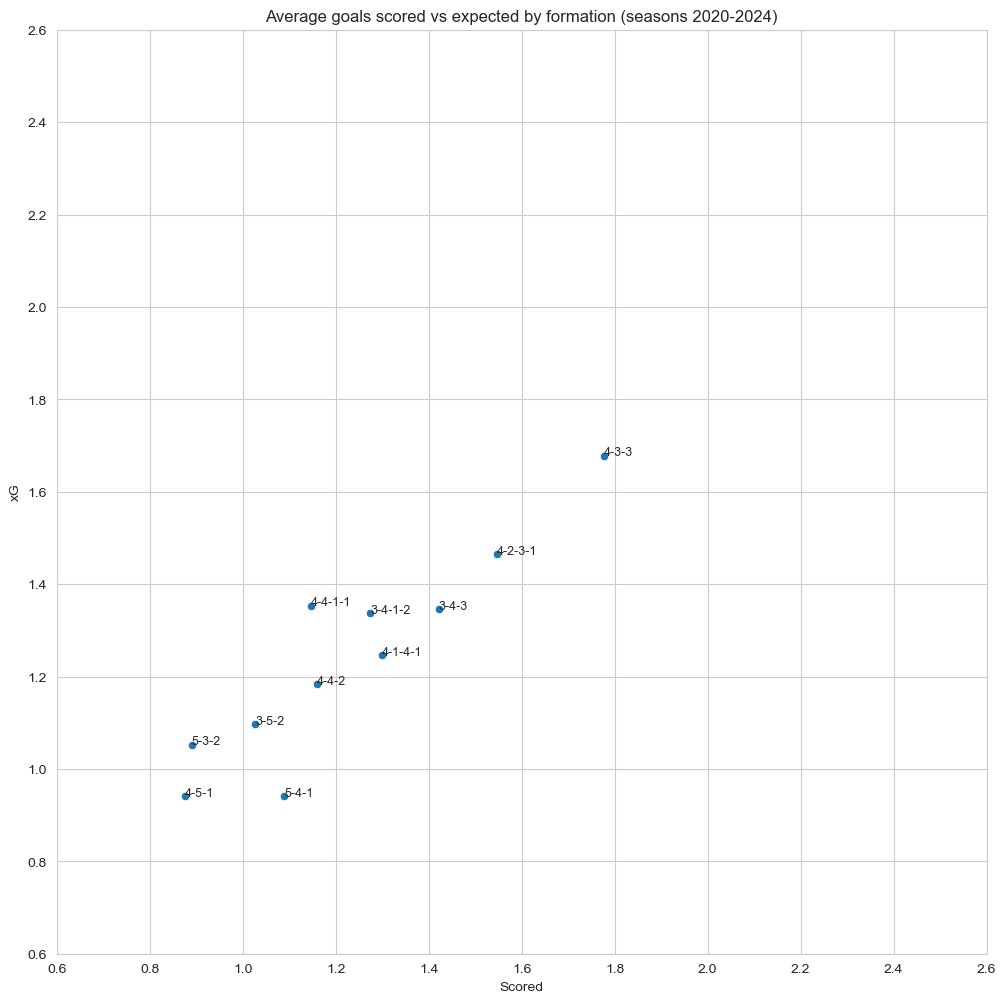

<Axes: title={'center': 'Average goals scored vs expected by formation (seasons 2020-2024)'}, xlabel='Scored', ylabel='xG'>

In [18]:
# Compare goals scored and expected

gf_xg_formation = {
    "Figsize": (12, 12),
    "Data": data_formation_performance,
    "X": "gf",
    "Y": "xg",
    "Title": "Average goals scored vs expected by formation (seasons 2020-2024)",
    "Xlabel": "Scored",
    "Ylabel": "xG",
    "Xlim": (0.6, 2.6),
    "Ylim": (0.6, 2.6),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(0.6, 2.8, 0.2)),
    "Column": "formation",
    "Fontsize": 9
    }

custom_scatter(**gf_xg_formation)

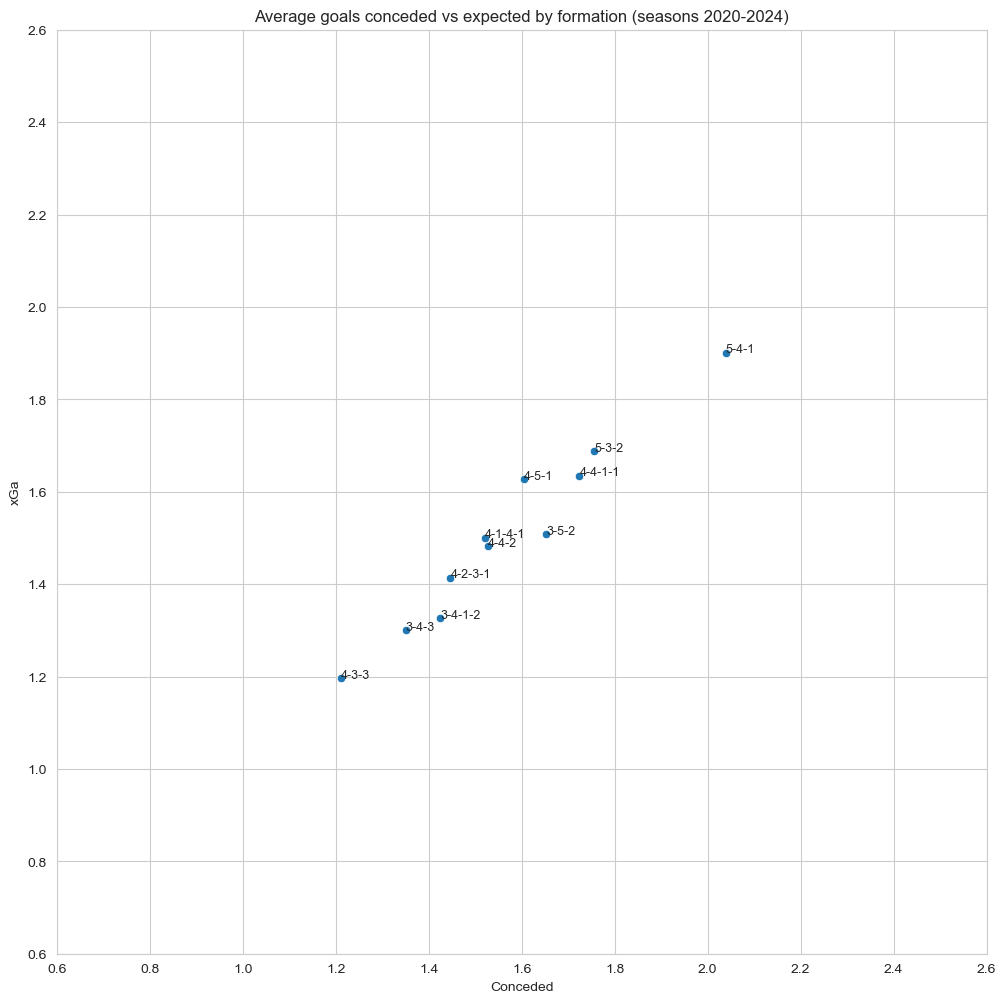

<Axes: title={'center': 'Average goals conceded vs expected by formation (seasons 2020-2024)'}, xlabel='Conceded', ylabel='xGa'>

In [19]:
# Compare expected goals conceded and expected

ga_xga_formation = {
    "Figsize": (12, 12),
    "Data": data_formation_performance,
    "X": "ga",
    "Y": "xga",
    "Title": "Average goals conceded vs expected by formation (seasons 2020-2024)",
    "Xlabel": "Conceded",
    "Ylabel": "xGa",
    "Xlim": (0.6, 2.6),
    "Ylim": (0.6, 2.6),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(0.6, 2.8, 0.2)),
    "Column": "formation",
    "Fontsize": 9
    }
    
custom_scatter(**ga_xga_formation)

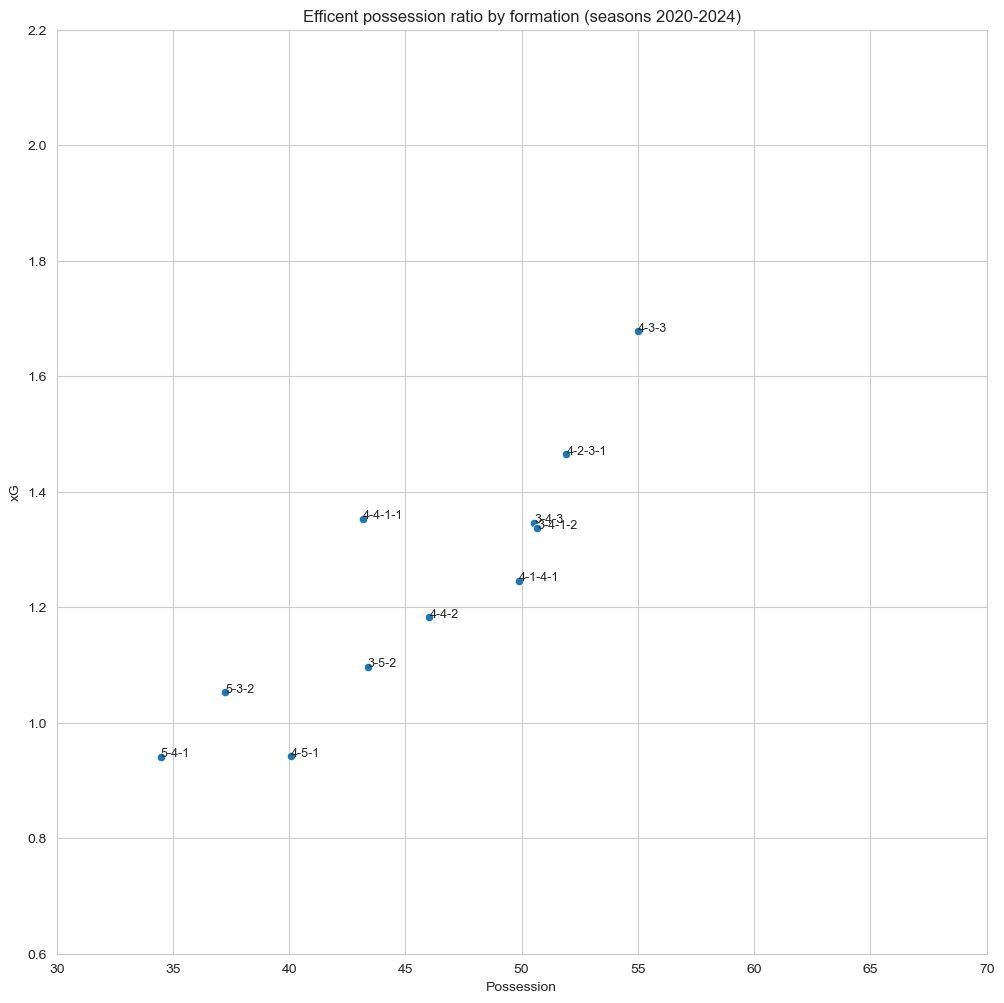

<Axes: title={'center': 'Efficent possession ratio by formation (seasons 2020-2024)'}, xlabel='Possession', ylabel='xG'>

In [20]:
# Compare possession and expected goals

poss_xg_formation = {
    "Figsize": (12, 12),
    "Data": data_formation_performance,
    "X": "poss",
    "Y": "xg",
    "Title": "Efficent possession ratio by formation (seasons 2020-2024)",
    "Xlabel": "Possession",
    "Ylabel": "xG",
    "Xlim": (30, 70),
    "Ylim": (0.6, 2.2),
    "Xticks": (np.arange(30, 75, 5)),
    "Yticks": (np.arange(0.6, 2.4, 0.2)),
    "Column": "formation",
    "Fontsize": 9
    }
    
custom_scatter(**poss_xg_formation)

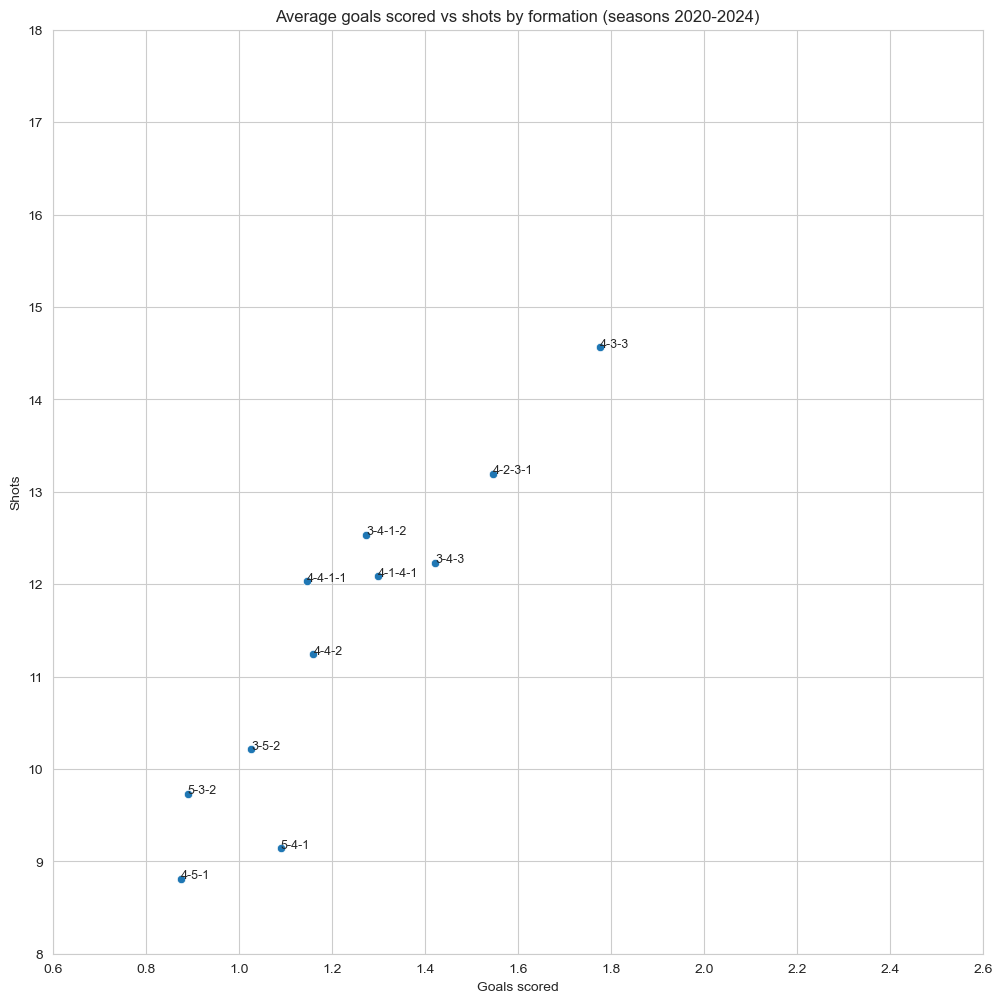

<Axes: title={'center': 'Average goals scored vs shots by formation (seasons 2020-2024)'}, xlabel='Goals scored', ylabel='Shots'>

In [84]:
# Compare goals scored and shots

gf_sh_formation = {
    "Figsize": (12, 12),
    "Data": data_formation_performance,
    "X": "gf",
    "Y": "sh",
    "Title": "Average goals scored vs shots by formation (seasons 2020-2024)",
    "Xlabel": "Goals scored",
    "Ylabel": "Shots",
    "Xlim": (0.6, 2.6),
    "Ylim": (8, 18),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(8, 19, 1)),
    "Column": "formation",
    "Fontsize": 9
    }

custom_scatter(**gf_sh_formation)

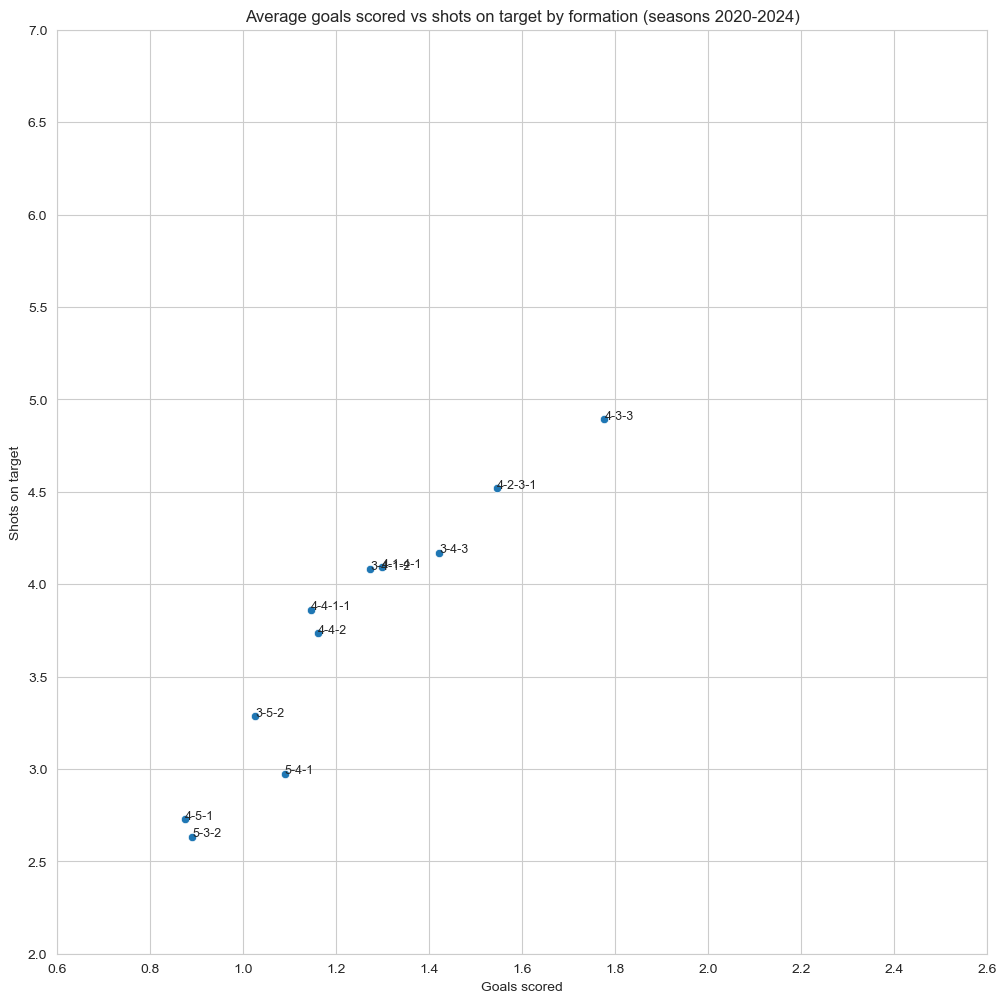

<Axes: title={'center': 'Average goals scored vs shots on target by formation (seasons 2020-2024)'}, xlabel='Goals scored', ylabel='Shots on target'>

In [88]:
# Compare goals scored and shots on target

gf_sot_formation = {
    "Figsize": (12, 12),
    "Data": data_formation_performance,
    "X": "gf",
    "Y": "sot",
    "Title": "Average goals scored vs shots on target by formation (seasons 2020-2024)",
    "Xlabel": "Goals scored",
    "Ylabel": "Shots on target",
    "Xlim": (0.6, 2.6),
    "Ylim": (2, 7),
    "Xticks": (np.arange(0.6, 2.8, 0.2)),
    "Yticks": (np.arange(2, 7.5, 0.5)),
    "Column": "formation",
    "Fontsize": 9
    }

custom_scatter(**gf_sot_formation)

In [23]:
# Analyze seasonal performance using points and expected points
data_team = data.drop(labels=['date', 'round', 'result', 'opponent', 'formation', 'last_5'], axis=1)

data_expected_table = data_team.groupby(by='team', observed=False)[['exppoints', 'points']] \
    .sum() \
    .reset_index() \
    .sort_values(['points'], ascending=False) \
    .reset_index(drop=True)

# Add new index to correctly show each team's place in the table
data_expected_table.index = data_expected_table.index + 1

data_expected_table

,team,exppoints,points
1,Manchester City,459,440
2,Liverpool,393,409
3,Arsenal,341,359
4,Manchester United,295,333
5,Tottenham Hotspur,275,318
6,Chelsea,359,314
7,Newcastle United,246,269
8,Aston Villa,238,264
9,West Ham United,228,252
10,Brighton and Hove Albion,295,243


In [24]:
# Subset and group data for each season (2020 to 2024)
seasons = [2020, 2021, 2022, 2023, 2024]
data_exp_table = {}

for season in seasons:
    grouped_data = data_team[data_team['season'] == season] \
                            .groupby(by='team', observed=False)[['exppoints', 'points', 'xgdiff']] \
                            .sum() \
                            .reset_index() \
                            .sort_values(['exppoints', 'xgdiff'], ascending=False) \
                            .iloc[0:20] \
                            .reset_index(drop=True)  # Reset the index
    
    # Add new index to correctly show each team's place in the table
    grouped_data.index = grouped_data.index + 1
    
    data_exp_table[season] = grouped_data

In [25]:
data_exp_table[2020]

,team,exppoints,points,xgdiff
1,Manchester City,90,81,55.5
2,Chelsea,76,66,30.5
3,Manchester United,71,66,24.4
4,Liverpool,70,99,31.2
5,Leicester City,68,62,16.7
6,Wolverhampton Wanderers,65,59,16.1
7,Southampton,62,52,3.1
8,Everton,52,49,2.5
9,Burnley,49,54,-2.5
10,Brighton and Hove Albion,48,41,-9.1


In [26]:
data_exp_table[2021]

,team,exppoints,points,xgdiff
1,Manchester City,88,86,38.2
2,Chelsea,84,67,32.1
3,Liverpool,79,69,24.5
4,Manchester United,67,74,18.0
5,Brighton and Hove Albion,65,41,15.6
6,Leicester City,63,66,10.4
7,West Ham United,58,65,6.4
8,Arsenal,56,61,8.8
9,Tottenham Hotspur,53,62,4.2
10,Leeds United,52,59,-2.6


In [27]:
data_exp_table[2022]

,team,exppoints,points,xgdiff
1,Manchester City,106,93,63.8
2,Liverpool,89,92,55.1
3,Chelsea,76,74,30.3
4,Arsenal,69,69,14.8
5,Tottenham Hotspur,63,71,21.7
6,Crystal Palace,60,48,5.2
7,Brighton and Hove Albion,54,51,3.3
8,Manchester United,51,58,2.6
9,West Ham United,46,56,-2.1
10,Brentford,46,46,-2.6


In [28]:
data_exp_table[2023]

,team,exppoints,points,xgdiff
1,Manchester City,86,89,46.4
2,Arsenal,81,84,29.3
3,Brighton and Hove Albion,77,62,23.4
4,Newcastle United,73,71,32.2
5,Liverpool,70,67,20.6
6,Manchester United,67,75,17.2
7,Brentford,62,59,7.4
8,Aston Villa,56,61,-2.3
9,Chelsea,55,44,-2.8
10,Tottenham Hotspur,54,60,7.8


In [29]:
data_exp_table[2024]

,team,exppoints,points,xgdiff
1,Arsenal,89,89,48.5
2,Manchester City,89,91,45.2
3,Liverpool,85,82,42.0
4,Newcastle United,70,60,14.6
5,Chelsea,68,63,16.2
6,Tottenham Hotspur,60,66,4.5
7,Aston Villa,58,68,3.5
8,Brighton and Hove Albion,51,48,0.9
9,Everton,48,48,-1.8
10,Bournemouth,48,48,-2.1
